# Control theory

Suppose that you want to maintain the temperature of some part of an experiment. You have a heater. You have a temperature sensor. The problem is: how to control the heater in such a way as to stabilise the temperature quickly, and accurately, to some desired value.

This is an example of a control theory problem. It is also called a servo-system problem. There are whole courses in engineering devoted to these problems and coming up with solutions. We are going to skim the subject just so that you are aware that it exists, and know where to go if you come up with these sorts of problems in your career as a physicist.

Control theory starts with the concept of a *plant*, in the sense of a well-defined system. A physicist might prefer to use the term *system*, or *experiment* rather than *plant*, but we will defer to our engineering colleagues and over 100 years of historical usage.

The plant has one of more *control inputs*, these are the things that you can alter to change the behaviour of the system. The plant also has one or more *outputs* - these are observable quantities such as the temperature. The plant may also have *disturbances* such as changes in environmental conditions with time.

Some examples will hopefully make this clearer:

```
  Plant        Input(s)          Disturbance(s)      Output(s)
  ------------------------------------------------------------
  Electrical   Voltage on        Change in ambient   Temperature at 
  heater       heater resistor   temperature         a point
  
  Car          Accelerator       Road gradient,      Speed
               pedal depression  wind
  
  Car          Steering wheel    Road direction,     Angle of car
               position          road camber,        relative to the
                                 road condition      road
                                 
  Skier        Forces on the     Change in slope,    Velocity,
               skies             ice conditions,     body position,
                                 wind                ski angles
                                 
  "Big Dog"    Motor torques     Changes in          Robot position
  Boston                         environment
  Dynamics
  -------------------------------------------------------------
```

The human brain is adept at solving practical problems in control theory (such as walking, running, skiing, roller-blading, ice-skating) by a process of exploring the behaviour as the input change. When you first learn a new skill you will be very tentative. As you gain experience you will become more confident. Sleep seems to be the period where the brain consolidates its knowledge of new servo-system experiences.

For examples of really complex servo-systems, see the following videos.

Boston Dynamics Big Dog [https://www.youtube.com/watch?v=cNZPRsrwumQ]

Boston Dynamics Spot Mini [https://www.youtube.com/watch?v=tf7IEVTDjng]

In physics, an understanding of control theory can be very helpful. Many experiments require some quantity to be stabilised. A common example is to keep the temperature of some part of the experiment constant. If the control isn't optimal, then the temperature may oscillate or otherwise diverge from the set point, and this can dramatically affect the experiment.

## Examples from M. Ashley's experiences

As an astronomer I often use instruments based on CCDs (Charged Coupled Devices). Just about every parameter of a CCD (quantum efficiency, read noise, gain, hot pixel distribution, dark current, flat field response, bias response, colour sensitivity, etc) depends on temperature. It is therefore crucial to control the temperature of the CCD, certainly within a few degrees K, and ideally better than 0.1K.

The temperature of a CCD is usually measured using a component on the same chip as the CCD, e.g., the forward voltage drop of a silicon diode, which has a -2mV/K dependence on temperature. The temperature is usually controlled by an electrical heater, which warms the CCD up above some baseline temperature set by a cooling system such as liquid nitrogen, a closed-cycle refrigerator, or a peltier effect device.

The main issue with CCD temperature control is that there is a time delay between changing the power in the heater element and the affect on the CCD temperature. This makes for a challenging control problem, since it is very easy for the system to oscillate or take a long time to stabilise.

In general with temperature regulation systems it is best to place the temperature sensor very close to the heater, in order to minimise the response time constant. However, the sensor also needs to be as close as possible to the device you are trying to regulate, and this isn't always compatible with the earlier requirement.

### Leach controller temperature regulation

In my first example, I needed to improve the temperature regulation of a CCD being driven by a "Leach controller" - a standard astronomical piece of electronics that has a long history. The problem was that the CCD temperature was taking a long time to stabilise if the ambient conditions changed. Further inspection showed that the system had the following problems:

* The signal from the temperature sensor was noisy.
* The ADC that read the temperature sensor had insufficient resolution: 1 ADU was about 1C.
* The control algorithm was not tuned properly, i.e., the command to the heater was not optimal given the difference between the temperature set-point, the actual temperature, and the derivative of the actual temperature.

I was able to fix this by doing the following:

* Improving the sensor noise by small modifications to the cabling from the sensor, and modifying the preamplifier that fed the ADC. This reduced the noise from 10 ADU peak-to-peak to less than 1 ADU.
* Averaging a large number (1024) measurements from the ADC. Each measurement took a millisecond, so the averaging only required a second, which was acceptable given the thermal time constants of the system.
* Tests then showed that the ADC was very stable, and it would be worth adding a 1-2 bits of well-controlled noise to the signal. I added the noise using an unused DAC output from the Leach controller to inject "noise" (in practice, a linear ramp signal, synchronised to the averaging period). This allowed sub-LSB digitisation, yielding an extra 6 bits of resolution. This is particularly useful for determining the derivative of the temperature, which is crucial in order to anticipate the future evolution.
* Using control theory (the point of these two lectures!) to derive a close-to-optimal setting for the heater power.

The end result of these changes was a greatly improved temperature regulation, as can be seen from the following plots.

The image below shows the original stability of the CCD temperature. The lower plot is before fixing the amplifier noise, and the upper one is after. Note the large amplitude oscillation with a period of about 10 minutes. Note also that the amplifier noise is not well behaved, so it is worth trying to eliminate it rather than simply averaging it out.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f1.png)

This plot shows the result of average 1024 measurements, after the improvements to the amplifier noise. You can now see the steps resulting from the ADC digitisation. The very regular nature of this plot indicates that the system is ideally suited to the addition of some noise to allow sub-LSB sampling.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f2.png)

This last plot shows the final performance of the system, using sub-LSB sampling to increase the resolution to 1/64th of an ADU (i.e., an extra 6 bits of resolution). The temperature now stabilises within a few minutes, with residual oscillations at the 0.01K level. The plot shows that the system is slightly under-damped, which gives scope for addition improvement to transient response.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f3.png)

### CCD temperature at Dome A

More recently I have been working with a CCD camera at Dome A in Antarctica. The commercial camera had a design flaw whereby the time constant between the heater and its affect on the CCD temperature was around 10 minutes, whereas the controller the manufacturer had used was designed for time constants only up to around 10 seconds. Consequently, the CCD temperature oscillated wildly (up to 10C peak-to-peak), with a period of ten minutes. An additional problem is that every time the heater turned on, it caused the apparent CCD temperature to instantaneously jump by a couple of degrees, due to ground loops in the temperature sensor circuitry.

Solving this control problem was difficult since the problem was only discovered after the system was deployed to Antarctica, and after everyone had left the site - not to return for 11 months. Furthermore, there was no way to disable the controller remotely. The only control variable that we had was to alter the set-point. Fortunately, it was possible to design an algorithm (using control theory!) to update the set-point once a second to effectively take control away from the commercial controller. While not an ideal solution, the achieved performance was far superior to what we originally had.

The plot below shows the original situation with the CCD temperature. The set-point is shown in green, the measured temperature is shown in red. Where the red curve is smooth, the peltier cooler is trying to reach the set point, but is unable to do so. When the red curve shows "noise", the set point has been reached and the controller is causing the temperature to oscillate by almost 10K peak-to-peak on a timescale of about 10 minutes.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f4.png)

The plot below shows the situation after using a script to adjust the set-point once a second. The desired temperature was changed at 12 minutes, and you can see that the CCD temperature declined roughly linearly over 5 minutes or so and then stabilised to better than 1K with a few oscillations. While not ideal, this is a big improvement over the original situation. Further progress was hampered by the effect of the peltier cooler current on the apparent CCD temperature.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f5.png)

## Open loop, closed loop

The problem that control theory addresses is: how do you set the control input for a plant to best achieve a desired output?

There are two fundamental approaches to controlling a plant:

* *Open loop*, i.e., you set the control input(s) purely on the basis of the desired output(s) (and possibly your knowledge of the disturbance(s)).

* *Closed loop*, you compare the output(s) with the desired output(s) (the *reference(s)*) and use this information, together with your knowledge of the disturbance(s) and the plant, to set the control input(s).

Pretty obviously, open loop isn't going to be very effective in most situations (e.g., imagine trying to ski open loop!).

Closed loop control is also known as *feedback control*, i.e., you take a sample of the plant output, and feed this back to the input in such a way as to stabilise the system.

## Analytic solutions to plant behaviour

To make control problems tractable, we are going to concentrate on relatively simple systems: those with one input, one output, and governed by linear ODEs with non time-varying coefficients (although we will allow the forcing functions to vary with time). Recall that a "linear" ODE is one with at most first power in the independent variable and its derivatives.

For example, here is a first order linear ODE with a forcing function $u(t)$:

$$\dot y+ky=u(t)$$

## How to solve linear ODEs

Using the above ODE as an example, let's explore how we might solve it. First, realise that if we apply the same operation to both sides of the ODE, the equation remains true. E.g., we could multiply both sides by 2. More interestingly, we can apply a mathematical *transform* to both sides of the equation.

Now, without justifying the choice at this stage, let's see what happens if we apply the Laplace transform, defined by

$$\mathscr{L}\{f(t)\}=\int_0^\infty f(t)e^{-st}dt=F(s)$$

To get a feel for the Laplace transform, let's plot $e^{-st}$ for various values of $s$:

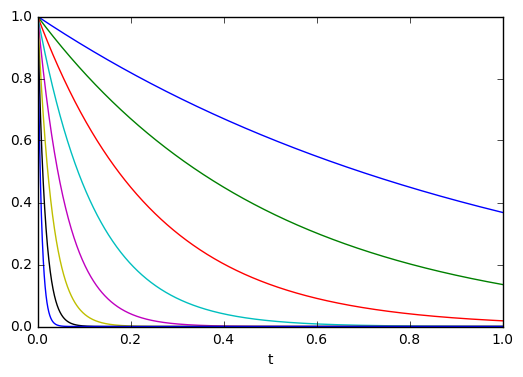

In [9]:
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# Make a numpy array of 1000 time points from t=0 to t=1.

t = np.linspace(0, 1, 1000)

# Plot e^{-st} for various value of s.

plt.plot(t, np.exp(-t))
plt.plot(t, np.exp(-2*t))
plt.plot(t, np.exp(-4*t))
plt.plot(t, np.exp(-8*t))
plt.plot(t, np.exp(-16*t))
plt.plot(t, np.exp(-32*t))
plt.plot(t, np.exp(-64*t))
plt.plot(t, np.exp(-128*t))

plt.xlabel("t")

plt.show()

In the above plots, the curves that decay most quickly have the highest values of $s$. 

### Key properties of Laplace transforms

#### SUPERIMPOSITION

$$\mathscr{L}\{\alpha f_1(t)+\beta f_2(t)\} = \alpha\mathscr{L}\{f_1(t)\}+\beta\mathscr{L}\{f_2(t)\}$$

The above property makes it easy to find the Laplace transform of functions that are the sum of functions with known transforms (typically found by looking them up in a table).

#### DIFFERENTIATION

$$\mathscr{L}\{\dot f\}=sF(s)-f(0^-)$$
$$\mathscr{L}\{\ddot f\}=s^2F(s)-sf(0^-)-\dot f(0^-)$$
$$\mathscr{L}\{\dddot f\}=s^3F(s)-s^2f(0^-)-s\dot f(0^-)-\ddot f(0^-)$$

and so on for higher order derivatives, where $f(0^-)$ is the value of $f(t)$ immediately before $t=0$.

These relationships are the most important property of the Laplace transform for our application: they turn an ODE into an algebraic equation, making the solution tractable. This comes about because 

$${{de^x}\over dx}=e^x$$

Note also that the action of transforming the ODE automatically incorporates the initial value conditions (i.e., $f(0^-)$, $\dot f(0^-)$, etc) into the answer.


#### INTEGRATION

$$\mathscr{L}\Bigl\{\int_0^t f(\tau)d\tau\Bigr\}={{F(s)}\over s}$$

Once again, the Laplace transform turns a calculus problem into an algebra problem.

#### TIME SHIFT

$$\mathscr{L}\{f(t-t_0)\}=e^{-t_0s}F(s)$$

### The Heaviside function and its Laplace transform

The Heaviside function, or unit-step function, $H(t)$ is defined to be zero if $t\lt0$ and 1 if $t\ge0$. This function is often used in control theory to examine the behaviour of the plant to a step input. You can easily specify the magnitude and time-offset of the step, e.g.,

$$\alpha H(t-t_0)$$

will give a step of magnitude $\alpha$ beginning at time $t_0$.

The Laplace transform of the Heaviside function is simply:

$$\mathscr{L}\{H(t)\}={1\over s}$$

### The Dirac Delta function and its Laplace transform

The Dirac Delta function, $\delta(t)$, is an unusual function that is defined to be zero for $t\ne0$ but with an integral of 1, i.e., $\int_{-\infty}^{+\infty}\delta(t)dt=1$. You can use it to model the response of a plant to an impulse.

The Laplace transform of the Dirac Delta function is very simple:

$$\mathscr{L}\{\delta(t)\}=1$$

which you can see must be correct by looking at the earlier plots of $e^{-st}$. These plots also make the time-shift property of the Laplace transform clear. For example:

$$\mathscr{L}\{\delta(t-t_0)\}=e^{-t_0s}$$

### Tables of transforms

Tables of Laplace transforms are readily available on the internet. To give you a flavour of what they look like, here are some examples:

$$\mathscr{L}\{t\}={1\over{s^2}}$$
$$\mathscr{L}\{t^2\}={2!\over{s^3}}$$
$$\mathscr{L}\{e^{-at}\}={1\over{s+a}}$$
$$\mathscr{L}\{te^{-at}\}={1\over{(s+a)^2}}$$
$$\mathscr{L}\{\sin(at)\}={a\over{s^2+a^2}}$$
$$\mathscr{L}\{\cos(at)\}={s\over{s^2+a^2}}$$

### On-line resources

For an excellent introduction to Laplace transforms, see
[http://tutorial.math.lamar.edu/Classes/DE/IVPWithLaplace.aspx]
